In [0]:
%tensorflow_version 2.0.0

**tensorflow_datasets (tfds)** defines a collection of datasets ready-to-use with TensorFlow.

Each dataset is defined as a **tfds.core.DatasetBuilder**, which encapsulates the logic to download the dataset and construct an input pipeline, as well as contains the dataset documentation (version, splits, number of examples, etc.).

The main library entrypoint is:
 


> **tfds.load**: convenience method to construct a builder, download the data, and create an input pipeline, returning a tf.data.Dataset.

A complete list of datasets can be found [here](https://www.tensorflow.org/datasets/catalog/overview).

**imdb_reviews** is a dataset for binary sentiment classification containing a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. 


In [0]:
#@title imdb_review
# Split the training set into 60% and 40%, so we'll end up with 15,000 examples
# for training, 10,000 examples for validation and 25,000 examples for testing.

import tensorflow_datasets as tfds
train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews", 
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True)


**[TensorFlow Hub](https://tfhub.dev/)** is a library for the publication, discovery, and consumption of reusable parts of machine learning models. A module is a self-contained piece of a TensorFlow graph, along with its weights and assets, that can be reused across different tasks in a process known as transfer learning.

The tensorflow_hub library provides the class **hub.KerasLayer** that gets initialized with the URL (or filesystem path) of a **SavedModel** and then provides the computation from the SavedModel, including its pre-trained weights.



```
hub_url = "https://tfhub.dev/google/tf2-preview/nnlm-en-dim128/1"
embed = hub.KerasLayer(hub_url, trainable=True)
```

The **trainable** flag indicates if you want to fine tune the pre-trained model or not (the default value is False).


The **Universal Sentence Encoder** is a transformer based tf-hub model which encodes text into high-dimensional vectors that can be used for text classification, semantic similarity, clustering and other natural language tasks.



In [2]:
#@title Universal Sentence Encoder
import tensorflow_hub as hub

USE_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4", trainable=True)

USE_layer (["this is a test sentence."]).numpy()[0][:10]

array([ 0.0474886 , -0.04986645, -0.01711429,  0.02992412, -0.05266665,
       -0.05958211,  0.00611431,  0.03350589,  0.04449553,  0.03384266],
      dtype=float32)

Now, Build a model with 2 hidden layers and a classification layer on top of Universal Sentence Encoder layer:

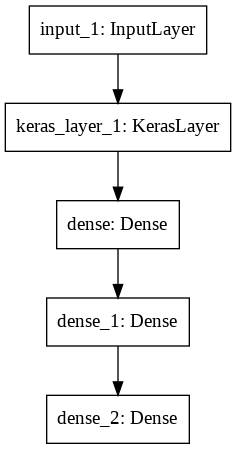

In [0]:
#@title your model should look like this
import tensorflow as tf

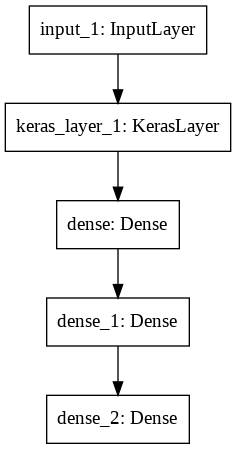

In [3]:
#@title build your model
import tensorflow as tf


#################################
#    Put your Implementation    #
#################################


model = tf.keras.Model(inputs= USE_inputs, outputs=outputs)

from tensorflow.keras.utils import plot_model
plot_model(model)

In [0]:
#@title train your model
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_data.shuffle(10000).batch(32),
                    epochs=5,
                    validation_data=validation_data.batch(512),
                    verbose=1)

In [0]:
#@title validate your model
results = model.evaluate(test_data.batch(512), verbose=1)

for name, value in zip(model.metrics_names, results):
  print("%s: %.3f" % (name, value))